# Graph-Based Risk Assessment in Cybersecurity Using Community Detection Techniques

Graph Construction and Visualization

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

In [32]:
# Create a directed multigraph
G = nx.MultiDiGraph()

In [33]:
# Dataset 1: Asset–Vulnerability Mapping
df1 = pd.read_csv(r"G:/PROJECT-SCM/Rezilyens/Dataset/asset_vulnerability_mapping.csv")

for _, row in df1.iterrows():
    asset = row['Asset']
    vuln = row['Vulnerability']
    cvss = row['CVSS Score']
    exploit_prob = row['Exploit Probability']

    G.add_node(asset, type="Asset")
    G.add_node(vuln, type="Vulnerability")
    G.add_edge(asset, vuln, relation="has_vulnerability", cvss=cvss, exploit_prob=exploit_prob)

In [34]:
# Dataset 2: Vulnerability–Attack Vector Mapping
df2 = pd.read_csv(r"G:/PROJECT-SCM/Rezilyens/Dataset/attack_vulnerability_mapping.csv")

for _, row in df2.iterrows():
    vuln = row['Vulnerability']
    vector = row['Attack Vector']
    success_prob = row['Success Probability']

    G.add_node(vector, type="AttackVector")
    G.add_edge(vuln, vector, relation="exploited_by", success_prob=success_prob)

In [35]:
# Dataset 3: Threat Actor–Asset Targeting
df3 = pd.read_csv(r"G:/PROJECT-SCM/Rezilyens/Dataset/threat_actor_asset_targeting.csv")

for _, row in df3.iterrows():
    actor = row['Threat Actor']
    asset = row['Asset']
    target_prob = row['Target Probability']

    G.add_node(actor, type="ThreatActor")
    G.add_edge(actor, asset, relation="targets", probability=target_prob)

In [36]:
# Dataset 4: Threat Actor–Attack Vector
df4 = pd.read_csv(r"G:/PROJECT-SCM/Rezilyens/Dataset/prior_attack_success_rate.csv")

for _, row in df4.iterrows():
    actor = row['Threat Actor']
    vector = row['Attack Vector']
    success_rate = row['Success Rate']

    # ensure attack vector node already exists or add if missing
    if not G.has_node(vector):
        G.add_node(vector, type="AttackVector")

    G.add_edge(actor, vector, relation="uses", success_rate=success_rate)

In [37]:
# Print No.of.Nodes and Edges
print("Total nodes:", G.number_of_nodes())
print("Total edges:", G.number_of_edges())

Total nodes: 44
Total edges: 101


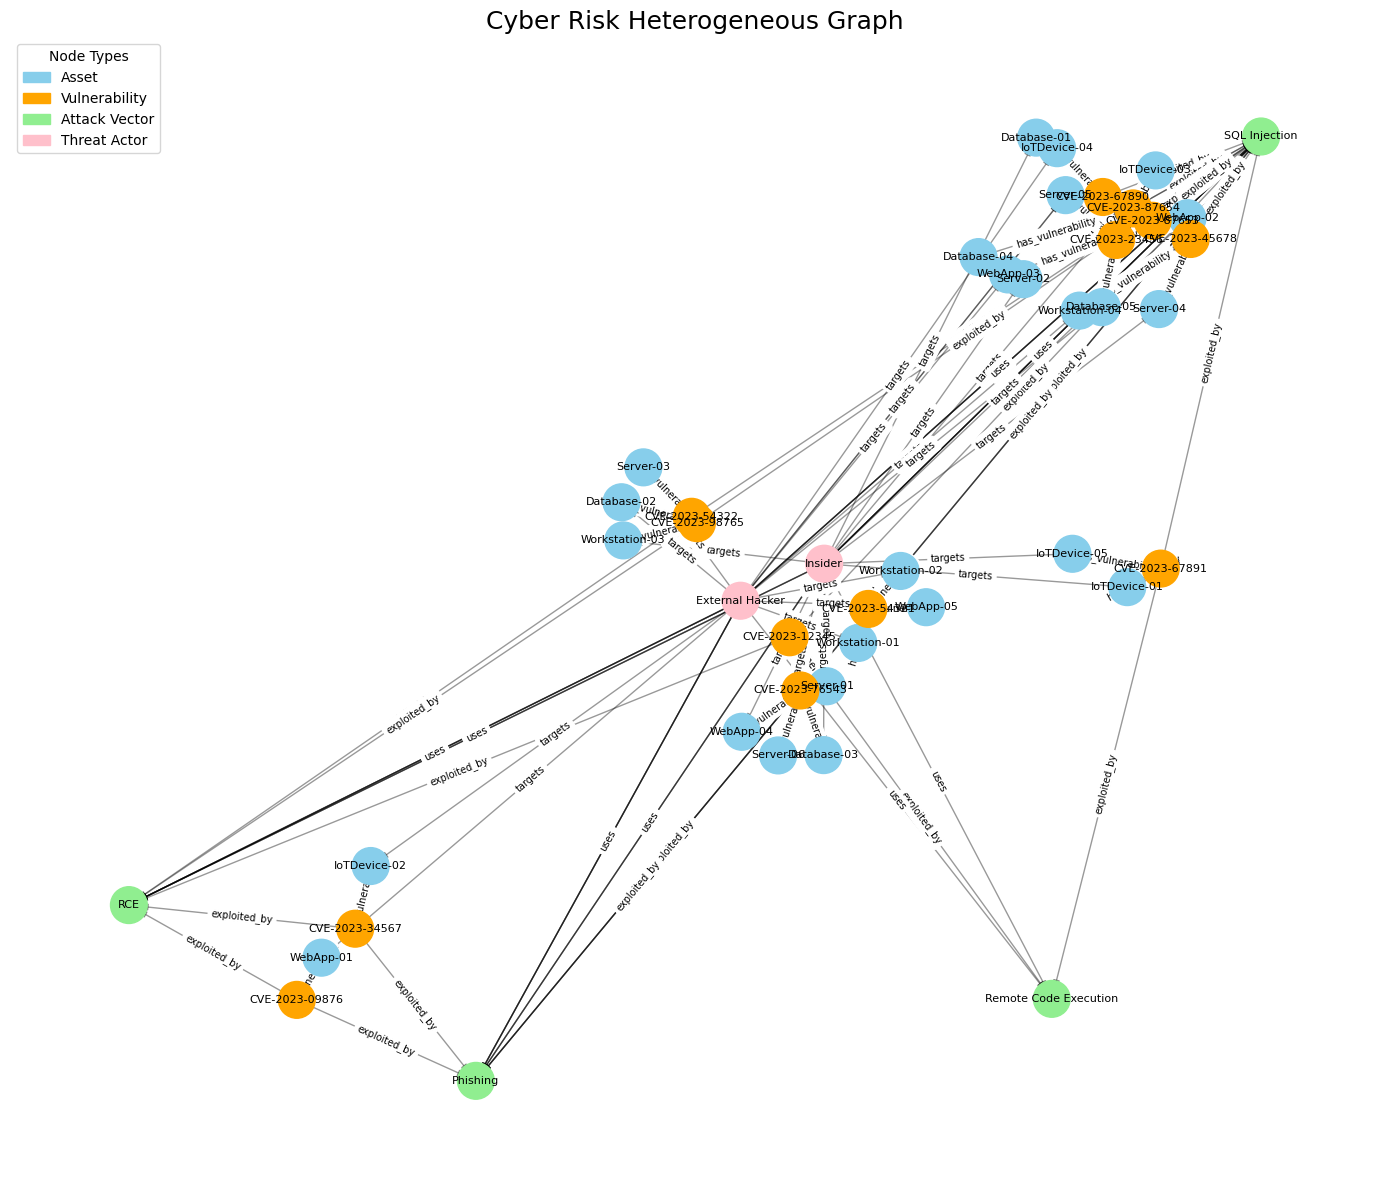

In [38]:
# Visualization
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, seed=42)

# Color nodes based on type
node_colors = {"Asset": "skyblue", "Vulnerability": "orange", "AttackVector": "lightgreen", "ThreatActor": "pink"}
colors = [node_colors.get(G.nodes[n].get('type', ''), "gray") for n in G.nodes]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=8)

# Draw edges
nx.draw_networkx_edges(G, pos, arrows=True, alpha=0.4)

# Add edge labels using "relation" attribute
edge_labels = {}
for u, v, k, data in G.edges(keys=True, data=True):
    relation = data.get("relation", "")
    edge_labels[(u, v, k)] = relation

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.5)

# --- Add Legend for Node Types ---
legend_patches = [
    mpatches.Patch(color='skyblue', label='Asset'),
    mpatches.Patch(color='orange', label='Vulnerability'),
    mpatches.Patch(color='lightgreen', label='Attack Vector'),
    mpatches.Patch(color='pink', label='Threat Actor')
]
plt.legend(handles=legend_patches, loc='upper left', fontsize=10, frameon=True, title="Node Types")

# Title and display
plt.title("Cyber Risk Heterogeneous Graph", fontsize=18)
plt.axis("off")
plt.tight_layout()
plt.show()

Louvain Clustering for Community Detection

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain
import matplotlib.cm as cm

In [40]:
# Convert to undirected simple graph
G_undirected = nx.Graph()
for u, v, data in G.edges(data=True):
    G_undirected.add_edge(u, v)

# Louvain community detection
partition = community_louvain.best_partition(G_undirected)

In [41]:
# Get the number of communities
num_communities = len(set(partition.values()))

# Print the number of communities
print(f"Number of Communities: {num_communities}")

Number of Communities: 7


In [42]:
# Print the nodes in each community and the number of nodes per community
community_nodes = {}
for node, community_id in partition.items():
    if community_id not in community_nodes:
        community_nodes[community_id] = []
    community_nodes[community_id].append(node)

# Print the nodes in each community
for community_id, nodes in community_nodes.items():
    print(f"Community {community_id}:")
    print(f"  Number of Nodes: {len(nodes)}")
    print(f"  Nodes: {nodes}")
    print()

Community 3:
  Number of Nodes: 11
  Nodes: ['Server-01', 'CVE-2023-12345', 'Remote Code Execution', 'IoTDevice-01', 'CVE-2023-67891', 'Database-03', 'CVE-2023-76543', 'Server-06', 'WebApp-04', 'IoTDevice-05', 'Insider']

Community 5:
  Number of Nodes: 13
  Nodes: ['RCE', 'Workstation-01', 'CVE-2023-54321', 'Phishing', 'WebApp-01', 'CVE-2023-09876', 'Server-03', 'CVE-2023-54322', 'Workstation-02', 'IoTDevice-02', 'CVE-2023-34567', 'WebApp-05', 'External Hacker']

Community 2:
  Number of Nodes: 6
  Nodes: ['SQL Injection', 'Server-02', 'CVE-2023-87654', 'Database-04', 'WebApp-03', 'CVE-2023-87653']

Community 4:
  Number of Nodes: 3
  Nodes: ['Database-01', 'CVE-2023-67890', 'IoTDevice-04']

Community 1:
  Number of Nodes: 3
  Nodes: ['Database-02', 'CVE-2023-98765', 'Workstation-03']

Community 0:
  Number of Nodes: 5
  Nodes: ['WebApp-02', 'CVE-2023-23456', 'IoTDevice-03', 'Server-05', 'Database-05']

Community 6:
  Number of Nodes: 3
  Nodes: ['Server-04', 'CVE-2023-45678', 'Workst

In [43]:
# Print communities
for node, community_id in partition.items():
    print(f"Node: {node}, Community: {community_id}")

Node: Server-01, Community: 3
Node: CVE-2023-12345, Community: 3
Node: Remote Code Execution, Community: 3
Node: RCE, Community: 5
Node: SQL Injection, Community: 2
Node: Workstation-01, Community: 5
Node: CVE-2023-54321, Community: 5
Node: Phishing, Community: 5
Node: Database-01, Community: 4
Node: CVE-2023-67890, Community: 4
Node: WebApp-01, Community: 5
Node: CVE-2023-09876, Community: 5
Node: IoTDevice-01, Community: 3
Node: CVE-2023-67891, Community: 3
Node: Server-02, Community: 2
Node: CVE-2023-87654, Community: 2
Node: Server-03, Community: 5
Node: CVE-2023-54322, Community: 5
Node: Database-02, Community: 1
Node: CVE-2023-98765, Community: 1
Node: Workstation-02, Community: 5
Node: WebApp-02, Community: 0
Node: CVE-2023-23456, Community: 0
Node: Database-03, Community: 3
Node: CVE-2023-76543, Community: 3
Node: IoTDevice-02, Community: 5
Node: CVE-2023-34567, Community: 5
Node: Server-04, Community: 6
Node: CVE-2023-45678, Community: 6
Node: Workstation-03, Community: 1
Node

C:\Users\Priyadharshini\AppData\Local\Temp\ipykernel_28584\1207741063.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


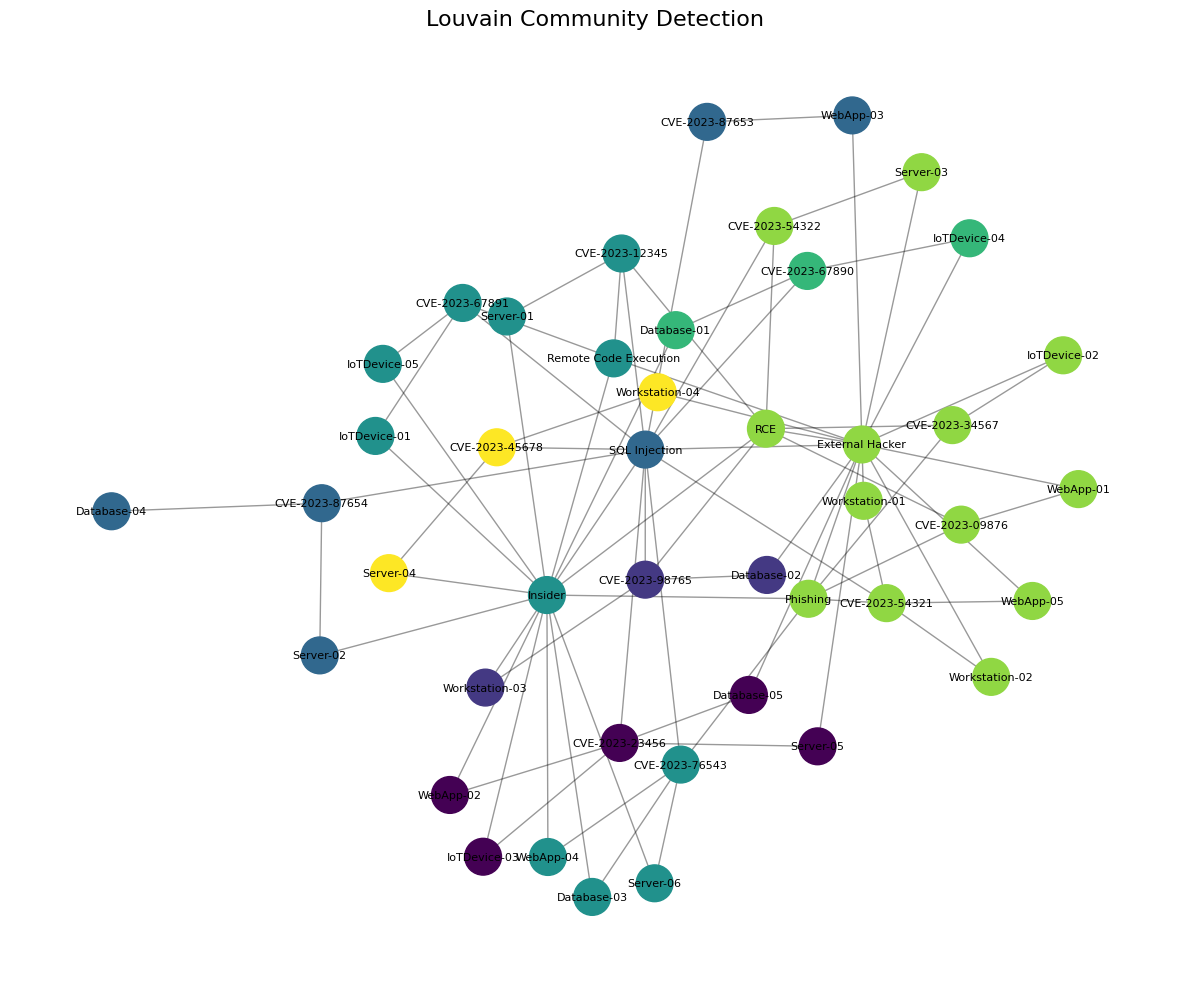

In [44]:
# Visualization
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_undirected, seed=42)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
node_colors = [cmap(partition[node]) for node in G_undirected.nodes]

nx.draw_networkx_nodes(G_undirected, pos, node_color=node_colors, node_size=700)
nx.draw_networkx_labels(G_undirected, pos, font_size=8)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.4)

plt.title("Louvain Community Detection", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()

Risk Scoring of Assets

In [45]:
import pandas as pd
import networkx as nx

In [46]:
# Use your undirected graph and Louvain partition
G_simple = G_undirected.copy()
partition = community_louvain.best_partition(G_simple)

In [ ]:
# Centrality measures
deg_centrality = nx.degree_centrality(G_simple)
btw_centrality = nx.betweenness_centrality(G_simple)

asset_risks = []

for node, data in G.nodes(data=True):
    if data.get('type') == 'Asset':
        degree = deg_centrality.get(node, 0)
        betweenness = btw_centrality.get(node, 0)
        cluster_id = partition.get(node, -1)

        # Risk from vulnerabilities
        cvss_total, exploit_total, vuln_count = 0, 0, 0
        threat_total, threat_count = 0, 0

        for neighbor in G[node]:
            edge_data = G.get_edge_data(node, neighbor)
            for _, attr in edge_data.items():
                if attr.get('relation') == 'has_vulnerability':
                    cvss_total += attr.get('cvss', 0)
                    exploit_total += attr.get('exploit_prob', 0)
                    vuln_count += 1

        # Risk from threat actors
        for n in G:
            if G.has_edge(n, node):
                for _, attr in G.get_edge_data(n, node).items():
                    if attr.get('relation') == 'targets':
                        threat_total += attr.get('probability', 0)
                        threat_count += 1

        avg_cvss = cvss_total / vuln_count if vuln_count else 0
        avg_exploit = exploit_total / vuln_count if vuln_count else 0
        avg_threat = threat_total / threat_count if threat_count else 0

        # Final weighted risk score (customizable weights)
        risk_score = (
            0.2 * degree +
            0.2 * betweenness +
            0.2 * avg_cvss +
            0.2 * avg_exploit +
            0.2 * avg_threat
        )

        asset_risks.append({
            'Asset': node,
            'Cluster ID': cluster_id,
            'Degree Centrality': round(degree, 4),
            'Betweenness Centrality': round(betweenness, 4),
            'Avg CVSS': round(avg_cvss, 4),
            'Avg Exploit Prob': round(avg_exploit, 4),
            'Avg Threat Target Prob': round(avg_threat, 4),
            'Risk Score': round(risk_score, 4)
        })

# Sort by Risk Score
risk_df = pd.DataFrame(asset_risks).sort_values(by='Risk Score', ascending=False)

In [54]:
# Display top 10 risky assets
print("\nTop Risky Assets:")
print(risk_df.head(5))


Top Risky Assets:
             Asset  Cluster ID  Degree Centrality  Betweenness Centrality  \
3        WebApp-01           6             0.0465                  0.0050   
19  Workstation-04           5             0.0465                  0.0075   
24       WebApp-05           6             0.0465                  0.0021   
5        Server-02           1             0.0465                  0.0112   
0        Server-01           0             0.0465                  0.0027   

    Avg CVSS  Avg Exploit Prob  Avg Threat Target Prob  Risk Score  
3        9.1              0.68                    0.70      2.1063  
19       9.0              0.70                    0.60      2.0708  
24       9.0              0.65                    0.60      2.0597  
5        8.9              0.80                    0.45      2.0415  
0        9.0              0.75                    0.40      2.0398  


In [53]:
# Save to CSV 
risk_df.to_csv("asset_risk_analysis.csv", index=False)
print("Successfully saved 'asset_risk_analysis.csv'")

Successfully saved 'asset_risk_analysis.csv'


Bar Chart of Asset Risk Scores

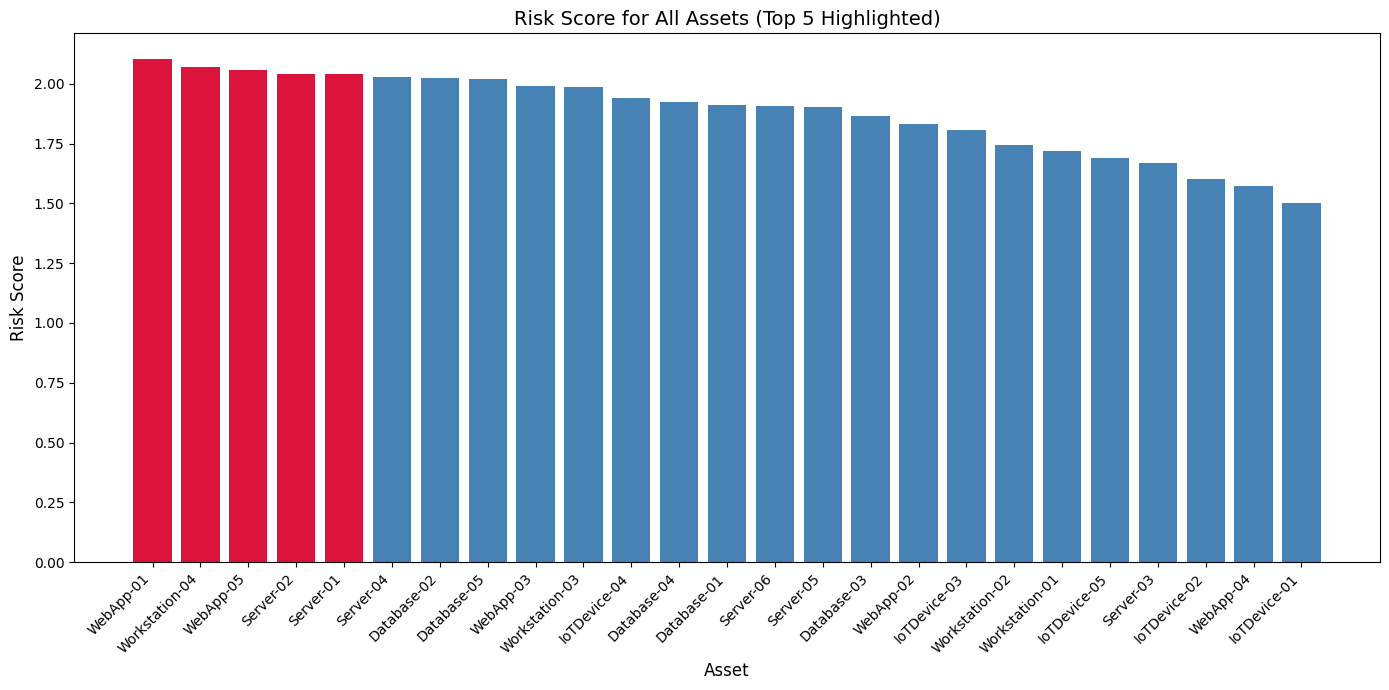

In [ ]:
import matplotlib.pyplot as plt

# Sort DataFrame by risk score
sorted_df = risk_df.reset_index(drop=True)

# Number of top assets to highlight
top_n = 5

# Assign colors: red for top N, blue for the rest
colors = ['crimson' if i < top_n else 'steelblue' for i in range(len(sorted_df))]

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(sorted_df['Asset'], sorted_df['Risk Score'], color=colors)
plt.xlabel("Asset", fontsize=12)
plt.ylabel("Risk Score", fontsize=12)
plt.title("Risk Score for All Assets (Top {} Highlighted)".format(top_n), fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()